Our project is to uncover patterns in music on Spotify between 2010 and 2019. We'll examine musical trends and genres through the years; which artists appeared most frequently.

* What is the most popular genre?


* Who is the most popular artist?


* Did we see artists make the top ten for various years or just one?

* Do beats per minute correlate to ‘dancibility’?

* What is the statistical analysis for beats per minute?

* Are any of the songs outliers?



# Tasks
* Collect the Data
* Clean and merge data
* Explore the data
* Create Analysis
* Create the Presentation

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import scipy.stats as stats




In [2]:
#Import data
music_data_to_load = "top10s.csv"

In [3]:
music_data_to_load


'top10s.csv'

In [6]:
# Data File and store into Pandas DataFrames
music_data_pd = pd.read_csv(music_data_to_load, sep=',', encoding='latin-1')
music_data_pd.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [8]:
 music_data_pd["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
neo mellow                     9
canadian contemporary r&b      9
art pop                        8
hip pop                        6
complextro                     6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
hip hop                        4
permanent wave                 4
latin                          4
colombian pop                  3
tropical house                 3
folk-pop                       2
brostep                        2
detroit hip hop                2
escape room                    2
indie pop                      2
electro                        2
electronic trap                2
downtempo                      2
canadian h

In [7]:
top_genre_df = pd.DataFrame({"total":  music_data_pd["top genre"].value_counts()})
top_genre_df.head()

,total
dance pop,327
pop,60
canadian pop,34
barbadian pop,15
boy band,15


In [10]:
# Determine most popular genre overall 
# top_genre = music_data_pd.groupby(["top genre"])
top_genre_df = pd.DataFrame({"total":  music_data_pd["top genre"].value_counts()})
top_genre_df = top_genre_df.sort_values("total", ascending=False)
top_genre_df
top_genre_df.reset_index(inplace=True)
top_genre_df
top_genre_df.columns = ["genre", "total"]
top_genre_df

,genre,total
0,dance pop,327
1,pop,60
2,canadian pop,34
3,barbadian pop,15
4,boy band,15
5,electropop,13
6,british soul,11
7,big room,10
8,neo mellow,9
9,canadian contemporary r&b,9


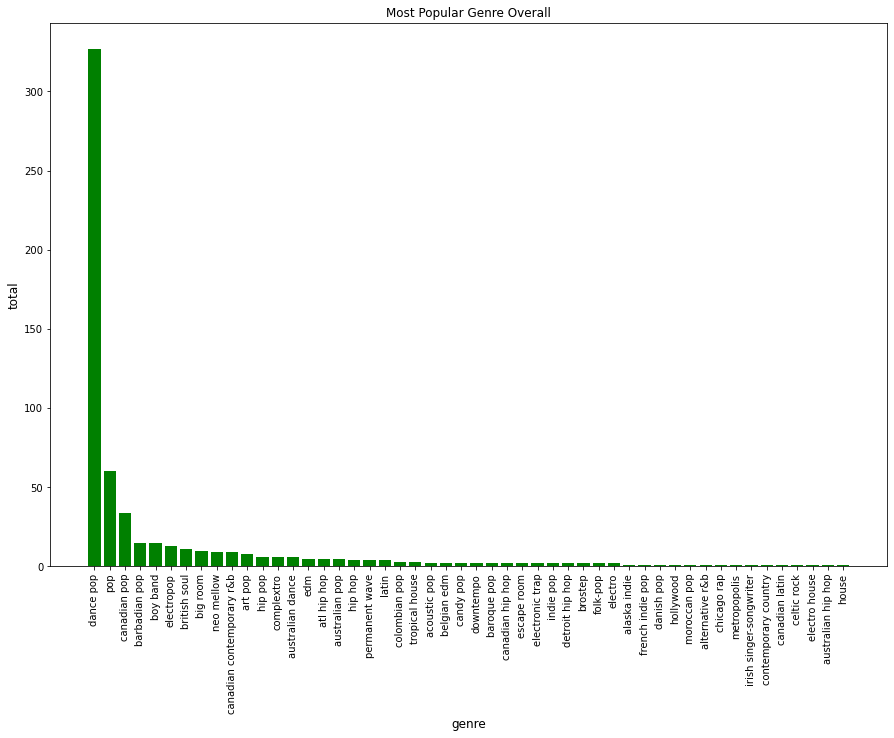

In [11]:
# Graph popular genre overall
plt.figure(figsize=[15,10])
x_values=top_genre_df['genre']
y_values=top_genre_df['total']

plt.bar(x_values, y_values, color = 'g')
plt.xlabel('genre', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('total', fontsize = 12)
plt.title('Most Popular Genre Overall')
plt.show()

# save plot as .pngs
#plt.savefig("../images/Most Popular Genre Overall.png")



In [13]:
top_genre_year_df = music_data_pd.groupby(["year", "top genre"]).count()

top_genre_year_df.head()

Unnamed: 0  title  artist  bpm  nrgy  dnce  dB  live  \
year top genre                                                              
2010 art pop                  1      1       1    1     1     1   1     1   
     atl hip hop              3      3       3    3     3     3   3     3   
     australian pop           2      2       2    2     2     2   2     2   
     barbadian pop            2      2       2    2     2     2   2     2   
     big room                 1      1       1    1     1     1   1     1   

                     val  dur  acous  spch  pop  
year top genre                                   
2010 art pop           1    1      1     1    1  
     atl hip hop       3    3      3     3    3  
     australian pop    2    2      2     2    2  
     barbadian pop     2    2      2     2    2  
     big room          1    1      1     1    1

In [14]:
# Determine most popular genre by year
top_genre_year_df = music_data_pd.groupby(["year", "top genre"]).count()
top_genre_year_df = top_genre_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
#top_genre_year_df.head()
clean_by_year_df = top_genre_year_df.drop(['title', 'artist', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                           'acous', 'spch', 'pop' ], axis=1)
#clean_by_year_df

cleaner_by_year_df = clean_by_year_df[(clean_by_year_df['Unnamed: 0']>11)]
cleaner_by_year_df.reset_index(inplace=True)
cleaner_by_year_df.columns = ["Year", "Top Genre", "Total"]
cleaner_by_year_df


,Year,Top Genre,Total
0,2018,dance pop,38
1,2017,dance pop,31
2,2016,dance pop,46
3,2015,dance pop,52
4,2014,dance pop,27
5,2013,dance pop,42
6,2012,dance pop,15
7,2011,dance pop,38
8,2010,dance pop,31


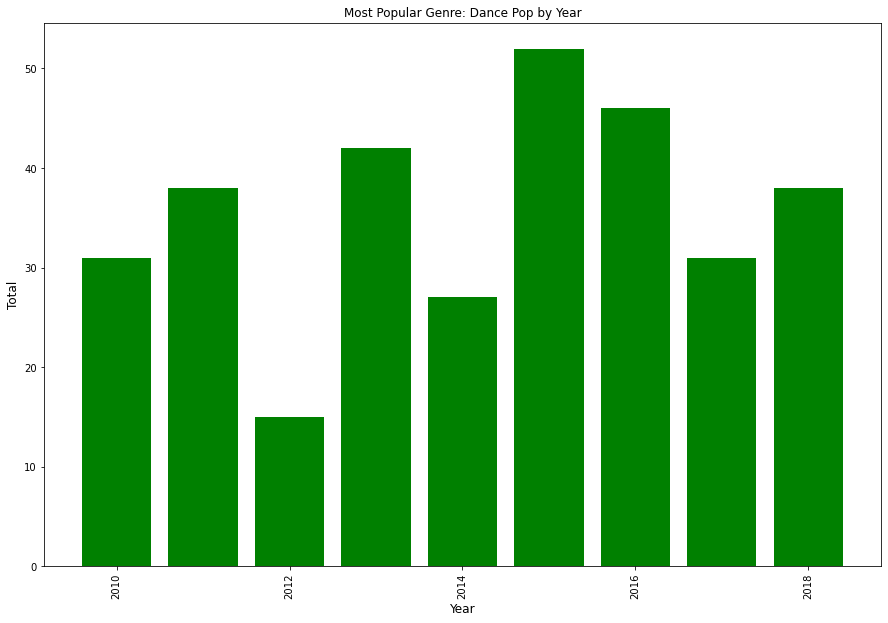

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=[15,10])
x_axis=cleaner_by_year_df['Year']
y_axis=cleaner_by_year_df['Total']

plt.bar(x_axis, y_axis, color = 'g')
plt.xlabel('Year', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('Total', fontsize = 12)
plt.title('Most Popular Genre: Dance Pop by Year')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Genre Overall.png")


In [16]:
# Most popular artist overall
top_artist_df = pd.DataFrame({"total":  music_data_pd["artist"].value_counts()})
top_artist_df = top_artist_df[(top_artist_df['total']>9)]
top_artist_df = top_artist_df.sort_values("total", ascending=False)
top_artist_df.reset_index(inplace=True)
top_artist_df.columns = ["artist", "total"]
top_artist_df

,artist,total
0,Katy Perry,17
1,Justin Bieber,16
2,Rihanna,15
3,Maroon 5,15
4,Lady Gaga,14
5,Bruno Mars,13
6,Ed Sheeran,11
7,The Chainsmokers,11
8,Shawn Mendes,11
9,Pitbull,11


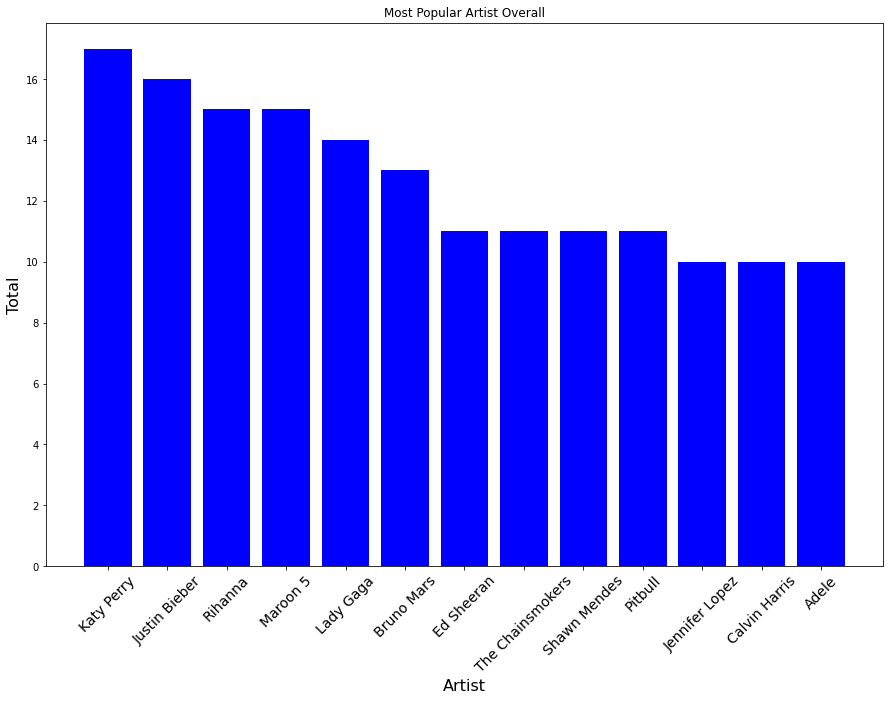

<Figure size 432x288 with 0 Axes>

In [17]:
# Graph most popular artist overall
plt.figure(figsize=[15,10])
x_values=top_artist_df['artist']
y_values=top_artist_df['total']

plt.bar(x_values, y_values, color = 'b')
plt.xlabel('Artist', fontsize = 16)
plt.xticks(rotation='45', fontsize = 14)

plt.ylabel('Total', fontsize = 16)
plt.title('Most Popular Artist Overall')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Artist Overall.png")

In [18]:
# Most popular artist by year
# Determine most popular artist by year
top_artist_year_df = music_data_pd.groupby(["year", "artist"]).count()
top_artist_year_df
top_artist_year_df = top_artist_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
top_artist_year_df.head()

#clean by year
clart_by_year_df = top_artist_year_df.drop(['title','top genre','bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                            'acous', 'spch', 'pop' ], axis=1)
#clart_by_year_df


clart_by_year_df = clart_by_year_df[(clart_by_year_df['Unnamed: 0']>=3)]
#clart_by_year_df
clart_by_year_df.reset_index(inplace=True)
clart_by_year_df.columns = ["Year", "Top Artist", "Total"]
clart_by_year_df


,Year,Top Artist,Total
0,2019,Ed Sheeran,5
1,2019,The Chainsmokers,3
2,2018,Shawn Mendes,4
3,2018,Dua Lipa,3
4,2018,Justin Timberlake,3
5,2018,Taylor Swift,3
6,2017,DNCE,3
7,2017,Katy Perry,3
8,2017,Lana Del Rey,3
9,2017,The Chainsmokers,3


In [19]:
# Most popular song overall
top_title_df = pd.DataFrame({"total":  music_data_pd["title"].value_counts()})
top_title_df = top_title_df[(top_title_df['total']>1)]
top_title_df = top_title_df.sort_values("total", ascending=False)
top_title_df.reset_index(inplace=True)
top_title_df.columns = ["title", "total"]
top_title_df

,title,total
0,A Little Party Never Killed Nobody (All We Got),2
1,Runnin' (Lose It All),2
2,Hello,2
3,Company,2
4,The Hills,2
5,We Are Never Ever Getting Back Together,2
6,Castle Walls (feat. Christina Aguilera),2
7,Here,2
8,Sugar,2
9,Kissing Strangers,2


In [20]:
# Calculate the statistical analysis for beats per minute

bpm_df = music_data_pd.drop(['artist','Unnamed: 0', 'year', 'title','top genre', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                            'acous', 'spch', 'pop' ], axis=1)

bpm_df

bpm_df.describe()


,bpm
count,603.000000
mean,118.545605
std,24.795358
min,0.000000
25%,100.000000
50%,120.000000
75%,129.000000
max,206.000000


In [29]:
# music_data_pd["top genre"].value_counts()

In [28]:
music_data_pd.loc[music_data_pd["top genre"]=="neo mellow"]


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
210,211,All of Me,John Legend,neo mellow,2014,120,26,42,-7,13,33,270,92,3,86
246,247,Wings,Birdy,neo mellow,2014,83,71,47,-5,16,22,252,8,3,62
249,250,Say Something,A Great Big World,neo mellow,2014,138,15,45,-9,9,9,229,87,3,61
255,256,Not About Angels,Birdy,neo mellow,2014,116,14,41,-10,9,23,190,97,4,56
260,261,Tee Shirt - Soundtrack Version,Birdy,neo mellow,2014,76,34,68,-9,9,56,160,84,3,49
261,262,Words as Weapons,Birdy,neo mellow,2014,120,35,53,-9,14,19,239,28,3,44
426,427,Keeping Your Head Up,Birdy,neo mellow,2016,122,78,60,-5,19,53,208,16,5,52
431,432,Start,John Legend,neo mellow,2016,110,4,52,-15,9,26,310,99,4,47


In [39]:
low_bound = 100
high_bound = 129

title_list = []
genre_list = []
bpm_list = []

for index, row in music_data_pd.iterrows():
#     print(row["title"], row["bpm"])
    title = row["title"]
    genre = row["top genre"]
    bpm = row["bpm"]
    
    if (bpm < low_bound) or (bpm > high_bound):
        print(f"\"{title}\" in \"{genre}\" genre has bpm {bpm} is an outlier.") 
        title_list.append(title)
        genre_list.append(genre)
        bpm_list.append(bpm)
#         break

"Hey, Soul Sister" in "neo mellow" genre has bpm 97 is an outlier.
"Love The Way You Lie" in "detroit hip hop" genre has bpm 87 is an outlier.
"Baby" in "canadian pop" genre has bpm 65 is an outlier.
"Secrets" in "dance pop" genre has bpm 148 is an outlier.
"Empire State of Mind (Part II) Broken Down" in "hip pop" genre has bpm 93 is an outlier.
"Marry You" in "pop" genre has bpm 145 is an outlier.
"Cooler Than Me - Single Mix" in "dance pop" genre has bpm 130 is an outlier.
"OMG (feat. will.i.am)" in "atl hip hop" genre has bpm 130 is an outlier.
"Alejandro" in "dance pop" genre has bpm 99 is an outlier.
"Meet Me Halfway" in "dance pop" genre has bpm 130 is an outlier.
"Whataya Want from Me" in "australian pop" genre has bpm 186 is an outlier.
"All The Right Moves" in "dance pop" genre has bpm 146 is an outlier.
"Animal" in "indie pop" genre has bpm 148 is an outlier.
"Naturally" in "dance pop" genre has bpm 133 is an outlier.
"3" in "dance pop" genre has bpm 135 is an outlier.
"My Fi

In [46]:
df = pd.DataFrame({
    "Title": title_list,
    "Genre": genre_list,
    "BPM": bpm_list
})

outliers = df["Title"].count()

print(f"There are {outliers} outliers")

df.head()

There are 274 outliers


,Title,Genre,BPM
0,"Hey, Soul Sister",neo mellow,97
1,Love The Way You Lie,detroit hip hop,87
2,Baby,canadian pop,65
3,Secrets,dance pop,148
4,Empire State of Mind (Part II) Broken Down,hip pop,93


In [21]:
# Are any songs outliers for beats per minute? Graph box and whisker plot

In [61]:
dnce_df = music_data_pd.loc[music_data_pd['top genre'] == "dance pop"]

dnce_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
10,11,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,2010,128,87,62,-4,6,47,235,3,3,73


In [62]:
bpm_average_df = dnce_df.groupby(['dnce']).mean()
bpm_average_df.head()

,Unnamed: 0,year,bpm,nrgy,dB,live,val,dur,acous,spch,pop
dnce,,,,,,,,,,,
23,45.0,2010.0,43.0,39.0,-6.0,14.0,7.0,257.0,85.0,4.0,56.0
26,398.0,2016.5,185.0,52.5,-7.0,12.0,19.0,246.0,17.5,4.5,81.0
28,360.0,2015.0,112.0,37.0,-7.0,11.0,8.0,273.0,45.0,4.0,36.0
29,37.0,2010.0,164.0,41.0,-5.0,13.0,7.0,264.0,83.0,3.0,61.0
30,88.0,2011.0,63.0,38.0,-7.0,7.0,26.0,274.0,38.0,3.0,60.0


In [ ]:
# Do beats per minute correlate to ‘dancibility’? Graph results

In [64]:
import scipy.stats as st

dnce_df = music_data_pd.loc[music_data_pd['top genre'] == "dance pop"]
bpm_average_df = dnce_df.groupby(['top genre']).mean()

# scipy.stats
# four types of correlations: Pearson correlation, Kendall rank correlation, 
# Spearman correlation, and the Point-Biserial correlation
corr=round(st.pearsonr(bpm_average_df['dnce'],bpm_average_df['bpm'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

# model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
# y_values = capomulin_average_df['Weight (g)']*model[0]+model[1]
# plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
# plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')

# plt.show()

ValueError: x and y must have length at least 2.